In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
______________________________________________

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
import numpy as np
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 43s 28ms/step - loss: 0.9594 - accuracy: 0.8445 - val_loss: 0.3335 - val_accuracy: 0.8799
Epoch 2/5
1500/1500 [==============================] - 44s 30ms/step - loss: 0.2894 - accuracy: 0.8949 - val_loss: 0.3148 - val_accuracy: 0.8908
Epoch 3/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2533 - accuracy: 0.9078 - val_loss: 0.2895 - val_accuracy: 0.8987
Epoch 4/5
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2296 - accuracy: 0.9158 - val_loss: 0.3207 - val_accuracy: 0.8907
Epoch 5/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2119 - accuracy: 0.9221 - val_loss: 0.3375 - val_accuracy: 0.8968


In [9]:
loss, acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 5ms/step - loss: 44.3330 - accuracy: 0.1301


In [10]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']

In [11]:
predictions = model.predict(test_x[:1])

1/1 [==============================] - 0s 94ms/step


In [12]:
import numpy as np

In [15]:
label = labels[np.argmax(predictions)]

sneaker


<function matplotlib.pyplot.show(close=None, block=None)>

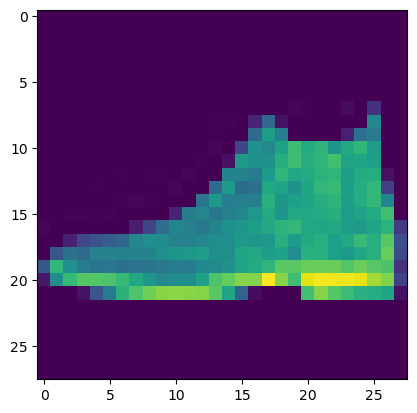

In [16]:
import matplotlib.pyplot as plt
print(label)
plt.imshow(test_x[:1][0])
plt.show